

# Project: Investigate a Dataset - [Medical Appointment Attendance]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

The Medical appointment attendance dataset to be investigated contains information from over 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment, and the reason behind the attendance . A number of characteristics about the patient are included in each row.

<li>‘ScheduledDay’ tells us on what day the patient set up their appointment.</li>
<li>‘Neighborhood’ indicates the location of the hospital.</li>
<li>‘Scholarship’ indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.</li>
<li>The 'SMS_received' columns shows patient that got an SMS reminder of their appointments.</li>
<li>The 'No-show' column can be confusing: it says ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up.</li>


### Question(s) for Analysis
We would be trying to find pointers that might indicate why certain patients showed up to their appointment and if some variables directly influence their ability or decision to attend.
<li>What role does the gender of the patient have to play in their ability to show up for their appointment?</li>
<li>Does the length between the schedule day and appointment day influence the appointment attendance?</li>
<li>Is age a factor in the patients ability to attend their appointment?</li>
<li>Are some neighbourhoods more difficult to access the appointment venue than others?</li>
<li>Are patients enrolled in the 'Bosia Familia' more likely to attend their appointments?</li>
<li>Does receiving an SMS reminder influence patients attendance?</li>

### Importing the packages to be used

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

>In this section, we would try to point out instances and occurences in the dataset that might need some cleaning and wrangling. To do this we would proceed by first loading the dataset into the workspace and then reading it to have a first view of what the data look like.`

In [4]:
# loading the data using pandas read_csv function
# We would refer to the variable where the dataframe is loaded into as 'med_apt' to denote medical appointment and better
# reflect the content of the dataframe

med_apt = pd.read_csv('med_apt.csv')
med_apt

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2.572134e+12,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3.596266e+12,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,1.557663e+13,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.213493e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No




From the cell above, we can tell that the dataset contains 110527 rows and 14 columns. We can also draw some insights into the
wrangling and cleansing procedures we might adopt to make the dataset suitale for analysis. Before we proceed to wrangling, we need to establish the columns that would be necessary for our exploration in order to know what columns needs to be gotten rid of:
<li>The 'PatientId' column would serve as a pointer to how many unique patients we have in the dataset.</li>
<li>The 'AppointmentID' column let's us know how many appointments were made in total</li>
<li>'Gender' and 'Age' would be extremely helpful in determining if the sex of the patient had a role to play in the attendance</li>
<li>'ScheduledDay' and 'AppointmentDay' do not seem necessary as the information provided are not consistent(most of the 
appoinments are set for an earlier time than they are scheduled)</li>
<li>We could use the Neighbourhood column to analyze if the area had a role to play in attendance</li>
<li>'Scholarship' denotes family that are beneficiaries of a social welfare program, and this would most likely influence attendance</li>
<li>'Hipertension','Diabetes','Alcoholism', and 'Handcap' might come in handy when deciding correlation between multiple illnesses.</li>
<li>'SMS_received' serves as some sort of reminder and should influence attendance</li>

> Let's proceed to checking the dataset in more depth in order to further draft out wrangling and cleansing techniques.

In [5]:
# checking the non null values and data types of the data set
med_apt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


>Looking above, there are no null values in the entire dataset. As for the data types, virtually all the columns are in their appropriate data type except the 'ScheduleDay' and 'AppointmentDay' columns which are objects instead of dates. We would be dropping those two columns as data in them are not consistent or relevant, therefore there would be no need to change their data types.

In [6]:
# checking for unique values in each column
med_apt.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

> The cell above shows 62299 unique patient IDs, and 110527 unique Appointment IDs, this means that a single patient can make multiple appointments.
Also, all of the 110527 appointments were scheduled for just 27 days in 81 neighborhoods.

In [33]:
# checking the count of different values in the handcap columns to confirm if something is off
med_apt.Handcap.value_counts()

0    108286
1      2042
2       183
3        13
4         3
Name: Handcap, dtype: int64

>The 'Handcap' columns has 5 unique values instead of just 2 to signify 'yes' and 'no'. We might need to drop the incorrect rows with values '2,3 and 4'.

In [34]:
# getting the basic statistics and aggregations of the numerical columns in the dataset
med_apt.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


> Fromm the cell above, checking the count, min, standard deviation and percentiles for all the columns with numbers in them, the 'Age' column stands out. It is impossible for someone to be '-1' years old. The max age being '115' also raises some concerns, but for the purpose of this analysis, we might decide to overlook it. 'Handcap' has a max value of '4' but that has been addressed in the previous cells.

In [36]:
# checking just the headers
med_apt.head(0)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show


> The column names are also either incorrectly spelt or not properly capitalized, we would also rename the columns and then convert them all to lower case


### Data Cleaning

Now that we've figured out the process to take in cleaning the data to make it suitable for analysis in the data wrangling section above, let's dive right into cleaning the data. Before we do that, let's outline all the steps that we identified earlier so we can reference anytime and also use as a pointer for comppletion:
<li>Drop the 'ScheduledDay' and 'AppointmentDay' columns.</li>
<li>Drop the rows in the 'Handcap' column that arent consistent with the results(containing 2,3, and 4).</li>
<li>Drop the row in the 'Age' column that has '-1' as it's value.</li>
<li>Make all column names lowercase.</li>
<li>Rename the columns and make them consistent.</li>

>Now let's dive right into cleaning.

### Dropping unnecessary columns

In [7]:
# We would use the pandas drop function and specify the axis to be the column (1)
# and make inplace to be True so the change is registered
# Then we view the changed columns

med_apt.drop(['ScheduledDay', 'AppointmentDay'], axis=1, inplace=True)
med_apt.head(0)

,PatientId,AppointmentID,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show


### Making the columns all lowercase

In [8]:
# The lambda function is employed here in other to go through the entire list of column names at once

med_apt.rename(columns = lambda x : x.lower(), inplace=True)
med_apt.head(0)

,patientid,appointmentid,gender,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no-show


### Renaming the misspelt columns and making them consistent with an '_'

In [9]:
# The pandas rename function is used here to rename more than one column in the dataframe

med_apt.rename(columns = {'patientid':'patient_id', 'appointmentid':'appointment_id', 'handcap':'handicap',\
                          'hipertension':'hypertension','no-show':'no_show'}, inplace=True)
med_apt.head(0)

,patient_id,appointment_id,gender,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show


### Dropping the row in the 'Age' column that has '-1' as it's value.

> First, we would find the row with the value for age being '-1' so we can identify the index

In [10]:
# we use query to see the row that has the age as -1
med_apt.query('age == -1')

,patient_id,appointment_id,gender,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
99832,4.659432e+14,5775010,F,-1,ROMÃO,0,0,0,0,0,0,No


> Next, we would drop the row with the index that aligns with the value above.

In [11]:
# we use the drop function and set axis to 0 to drop the row with the wrong value
med_apt.drop(99832, axis=0, inplace=True)

> Now, let's check the min value of ages in the dataset.

In [12]:
med_apt.describe()

,patient_id,appointment_id,age,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received
count,1.105260e+05,1.105260e+05,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000
mean,1.474934e+14,5.675304e+06,37.089219,0.098266,0.197248,0.071865,0.030400,0.022248,0.321029
std,2.560943e+14,7.129544e+04,23.110026,0.297676,0.397923,0.258266,0.171686,0.161543,0.466874
min,3.921784e+04,5.030230e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172536e+12,5.640285e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680572e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.438963e+13,5.725523e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


> It is apparent that something is still wrong with the 'age' column because the minimun value of age now says '0' which is equally as wrong as '-1'. A patient's age being '0' can mean that the patient is only a couple of months old and the appointment was made either by a parent or guidance. To be on the safe side, we would exclude any patient with an age of '0' and make '1' the only permitted minimum age.

In [13]:
# using the query function to see all rows with a value of 0 as the age
med_apt.query('age == 0')

,patient_id,appointment_id,gender,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
59,7.184428e+13,5638545,F,0,CONQUISTA,0,0,0,0,0,0,No
63,2.366233e+14,5628286,M,0,SÃO BENEDITO,0,0,0,0,0,0,No
64,1.885174e+14,5616082,M,0,ILHA DAS CAIEIRAS,0,0,0,0,0,1,No
65,2.718818e+14,5628321,M,0,CONQUISTA,0,0,0,0,0,0,No
67,8.647128e+13,5639264,F,0,NOVA PALESTINA,0,0,0,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...
110345,1.473952e+14,5702537,F,0,RESISTÊNCIA,0,0,0,0,0,0,No
110346,5.577525e+12,5777724,M,0,RESISTÊNCIA,0,0,0,0,0,0,No
110454,6.142460e+11,5772400,F,0,RESISTÊNCIA,0,0,0,0,0,0,No
110460,4.321846e+13,5769545,F,0,RESISTÊNCIA,0,0,0,0,0,0,No


> We have 3539 rows with 'age being '0'. Let's proceed to dropping those rows.

In [14]:
med_apt.drop(med_apt[med_apt.age==0].index, inplace=True)

In [15]:
med_apt

,patient_id,appointment_id,gender,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
0,2.987250e+13,5642903,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2.572134e+12,5651768,F,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3.596266e+12,5650093,F,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,1.557663e+13,5630692,F,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.213493e+13,5630323,F,38,MARIA ORTIZ,0,0,0,0,0,1,No


> The new dataframe has 106987 rows with 12 columns after dropping the rows that contains patient with age 0.

### Drop the rows in the 'Handcap' column that arent consistent with the results(containing 2,3, and 4).

> Finally, we would try to drop the rows with values (2,3, and 4) in their 'handicap' column as the column should only contain values 0 and 1 which signify 'No' and 'Yes' respectively. 
Let's take a look at the count for each value in the 'handicap' column:

In [16]:
med_apt.handicap.value_counts()

0    104747
1      2041
2       183
3        13
4         3
Name: handicap, dtype: int64

In [17]:
# checking rows with their handicap value greater than 1
med_apt[med_apt.handicap >1]

,patient_id,appointment_id,gender,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
946,7.282582e+13,5582483,M,94,BELA VISTA,0,1,1,0,2,1,No
1665,1.242919e+13,5525497,M,64,SANTA MARTHA,0,1,0,1,2,1,No
1666,1.242919e+13,5525498,M,64,SANTA MARTHA,0,1,0,1,2,0,No
2071,1.242919e+13,5640120,M,64,SANTA MARTHA,0,1,0,1,2,0,No
2091,1.491829e+13,5638626,F,11,ANDORINHAS,0,0,0,0,2,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...
108376,2.387212e+14,5756931,F,44,ROMÃO,0,1,1,0,2,1,No
109484,3.589495e+14,5752442,M,64,DA PENHA,0,1,1,0,2,0,No
109733,5.662976e+14,5772744,F,34,JUCUTUQUARA,0,0,0,0,2,1,No
109975,4.522185e+13,5766970,M,39,PRAIA DO SUÁ,1,0,0,0,2,1,No


> We have 199 rows of data with values above '1' in the handicap column

In [18]:
med_apt.drop(med_apt[med_apt.handicap >1].index, inplace=True)
med_apt

,patient_id,appointment_id,gender,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
0,2.987250e+13,5642903,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2.572134e+12,5651768,F,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3.596266e+12,5650093,F,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,1.557663e+13,5630692,F,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.213493e+13,5630323,F,38,MARIA ORTIZ,0,0,0,0,0,1,No


> This brings us to the end of the data wrangling and cleaning process. We now have our final dataframe with all the information we needed for the exploration clean and ready for analysis.
106788 rows and 12 columns.

<a id='eda'></a>
## Exploratory Data Analysis

> In this section we would be diving deep into the questions that were posed earlier and how we can answer the questions with the data available using apporpriate visuals and chart types. Firstly, let's plot a basic histogram with the numerical variables available in the dataset.

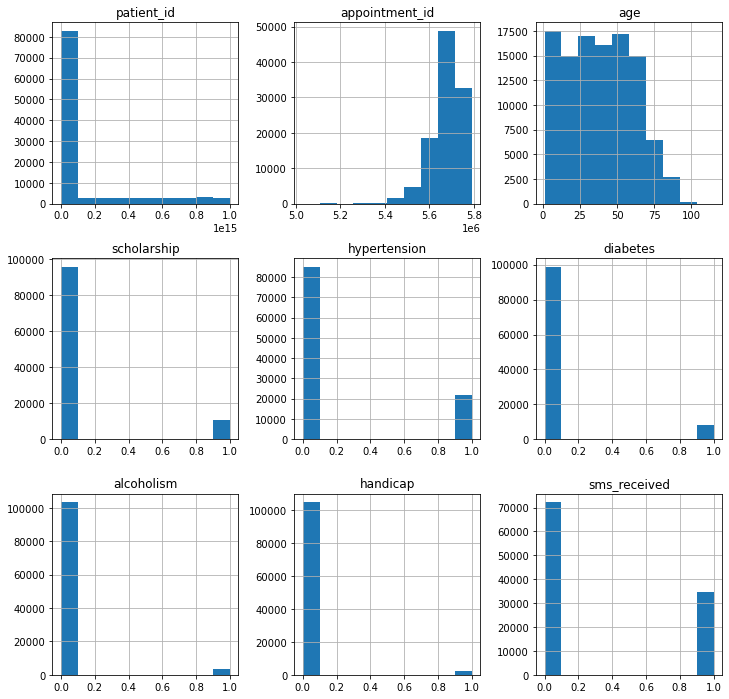

In [19]:
# plotting a simple histogram of the entire dataset using the hist function
med_apt.hist(figsize=[12,12]);

In [124]:
med_apt.describe()

,patient_id,appointment_id,age,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received
count,1.067880e+05,1.067880e+05,106788.000000,106788.000000,106788.000000,106788.000000,106788.000000,106788.000000,106788.000000
mean,1.473131e+14,5.675428e+06,38.299294,0.101051,0.203356,0.073978,0.031389,0.019113,0.323426
std,2.558722e+14,7.133632e+04,22.453253,0.301397,0.402497,0.261737,0.174368,0.136922,0.467786
min,3.921784e+04,5.030230e+06,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.175523e+12,5.640484e+06,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173700e+13,5.680740e+06,38.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.433654e+13,5.725627e+06,56.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


> From the simple histograms above, complemented with the table beneath it that describes the numerical columns of the data set, we can tell that the mean age is 38, majority of the population are not enrolled in the governments social welfare program, majority of the population did not receive a reminder SMS, minority of the population are disabled, and finally, alcoholism, diabetes and hypertension only affect a handful of the population. 
In the following cells, we would be evaluating how these variables go hand in hand in determining if patients showed up for their appointments or not.

### Research Question 1 (What role does gender have to play in appointment attendance?)

> We would like to evaluate if the gender of a patient is a pointer to their ability or negligence to attend appointments. Firstly, we'd examine their numbers and then go ahead to plot a graph to show the relation of the two variables ('gender' and 'no_show')

In [20]:
med_apt.gender.value_counts()

F    70009
M    36779
Name: gender, dtype: int64

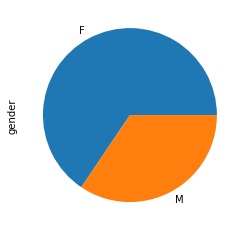

In [21]:
# simple pie chart showing the percentage of male to female
med_apt.gender.value_counts().plot(kind='pie');

> It is apparent that women are almost twice the size of men in the population.

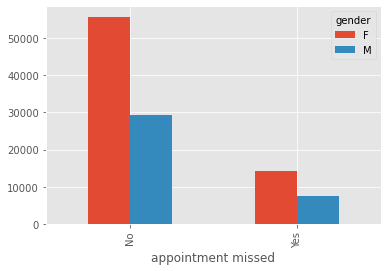

In [22]:
# plotting an unstacked bar chart using the plot function, and setting the legend and x label
plt.style.use('ggplot')
med_apt.groupby(['no_show', 'gender']).gender.count().unstack().plot.bar(legend=True, xlabel='appointment missed');

> From the bar chart above, it's obvious that the gender has nothing to do with the attendance of the appointment, as the size of women who showed up for the appointment is almost double the size of men, and this also applies to the number of people who didn't show up. This figure is synonymous to the overall size of the population, with the female being almost double of the male size. So it can be deduced that the reason more women showed up is because there were more women in the sample population and vice versa.

### Research Question 2  (Is age a factor in the patient's ability to attend their appointment?)

> Are younger people more likely to attend their appointment? Does the age of the patient hinder them from making their appointment? Let's take a look at the data to find out.

In [23]:
med_apt.age.nunique()

102

In [24]:
med_apt.describe()

,patient_id,appointment_id,age,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received
count,1.067880e+05,1.067880e+05,106788.000000,106788.000000,106788.000000,106788.000000,106788.000000,106788.000000,106788.000000
mean,1.473131e+14,5.675428e+06,38.299294,0.101051,0.203356,0.073978,0.031389,0.019113,0.323426
std,2.558722e+14,7.133632e+04,22.453253,0.301397,0.402497,0.261737,0.174368,0.136922,0.467786
min,3.921784e+04,5.030230e+06,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.175523e+12,5.640484e+06,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173700e+13,5.680740e+06,38.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.433654e+13,5.725627e+06,56.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


> For the sole reason that we have 102 unique ages with the minimun being '1' and the maximum being '115', we definitely have to create a new column that contains age ranges so we can narrow down the ages into ranges to better plot our chart and get better visualization.

In [77]:
# setting conditions to be used to create the new column for age group
conditions = [(med_apt.age > 60), (med_apt.age > 47), (med_apt.age > 33), (med_apt.age > 19),\
              (med_apt.age > 12), (med_apt.age > 0)]

In [78]:
values = ['elderly','senior adult','middle age adult','adult','teenager','children']

In [79]:
med_apt['age_group'] = np.select(conditions, values)

In [82]:
med_apt['age_group'].value_counts()

middle age adult    20316
senior adult        20299
elderly             19691
adult               19660
children            17475
teenager             9347
Name: age_group, dtype: int64

> We need to make sure the age groups are spread evenly between themselves so that a single group can be represented acccurately. Therefore the 4 top groups have been structured in such a way that they contain around 20,000 values. The exceptions being children and teenagers which have a fixed age range of '1-12' and '13-19' respectively.

In [84]:
med_apt.head()

,patient_id,appointment_id,gender,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,age_group
0,2.987250e+13,5642903,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No,elderly
1,5.589978e+14,5642503,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No,senior adult
2,4.262962e+12,5642549,F,62,MATA DA PRAIA,0,0,0,0,0,0,No,elderly
3,8.679512e+11,5642828,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,children
4,8.841186e+12,5642494,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No,senior adult


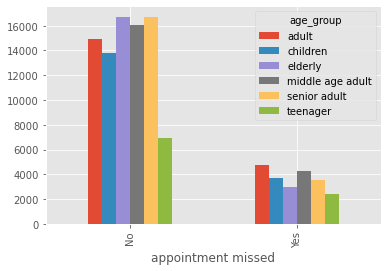

In [81]:
med_apt.groupby(['no_show', 'age_group']).age_group.count().unstack().plot.bar(legend=True, xlabel='appointment missed');

> Even if the correlation is not entirely strong, it is necessary to note that older people tend to attend their appointments than younger people, with the 'elderly' and 'senior adult' topping the chart for attendance. The 'elderly' also has the lowest number of people who missed their appointments after teenagers, strongly because the teengers population isn't well represented. However, these variables are not strongly correlated enough to be trusted to infer a cause.

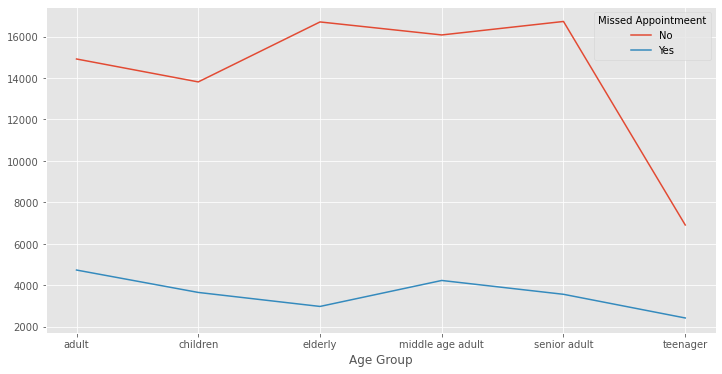

In [97]:
med_apt.groupby(['age_group', 'no_show']).no_show.count().unstack().plot.line(legend=True, figsize=(12,6), xlabel='Age Group')
plt.legend(['No', 'Yes'],
            loc='upper right', title='Missed Appointmeent')

> It is more obvious from the line chat the information conveyed above. Elderly people are more likely to attend their appointment than younger people.

### Research Question 3  (Are patients enrolled in the 'Bosia Familia' more likely to attend their appointments?)

> The Bosia Familia is a social welfare program organised by the government of Brazil, aimed at providing financial aid to poor Brazilian families. We would be analysing to see if the enrollment in this program has an influence on the appointment attendance>

In [101]:
med_apt.scholarship.value_counts()

0    95997
1    10791
Name: scholarship, dtype: int64

> '1' signifying being enrolled in the scholarship program and '0' showing patients who aren't enrolled, it shows that only about 10% of the entire population were enrolled in the program.

In [113]:
med_apt.groupby(['no_show','scholarship']).scholarship.count()

no_show  scholarship
No       0              76928
         1               8221
Yes      0              19069
         1               2570
Name: scholarship, dtype: int64

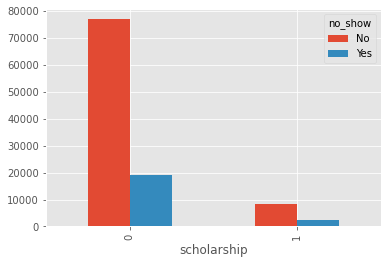

In [115]:
med_apt.groupby(['scholarship','no_show']).scholarship.count().unstack().plot.bar();

> Of the 95,997 patient who didn't have the scholarship, almost 20% didn't show up. Meanwhile for the ones who got the scholarship, 2570 people accounting for 30% of their population didn't show up. It's almost as if the patients who were on a scholarship didn't take the attendance of the appointment seriously. It is shown more clearly in the pie chart below, the percentage of those who got the scholatship represented by '1' and those who didn't represented by '0'. More people (blue) missed the appointment in the '1' chart than the '0'.

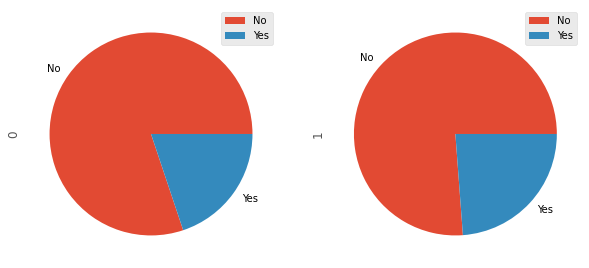

In [136]:
# using a pie chart to better visualize the difference in attendance
med_apt.groupby(['no_show','scholarship']).no_show.count().unstack().plot.pie(subplots=True,\
                figsize=(10,10));

### Research Question 4  (Does receiving an SMS reminder influence patients attendance?)

> Finally, we are going to evaluate the relationship, if any, between receiving an SMS reminder of the appointment and the attendance of the appointment

In [132]:
med_apt.sms_received.value_counts()

0    72250
1    34538
Name: sms_received, dtype: int64

> We can see that the people who didn't receive any SMS are twice the size of people who did. We'd use the same method as we used in the previous question above.

In [133]:
med_apt.groupby(['no_show','sms_received']).sms_received.count()

no_show  sms_received
No       0               60170
         1               24979
Yes      0               12080
         1                9559
Name: sms_received, dtype: int64

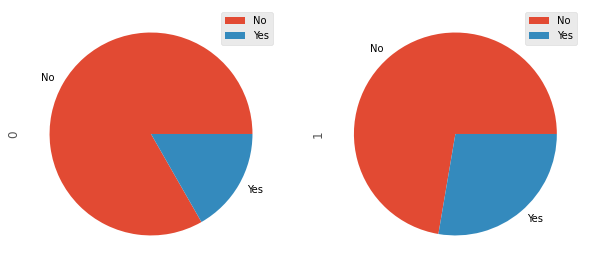

In [134]:
med_apt.groupby(['no_show','sms_received']).no_show.count().unstack().plot.pie(subplots=True,\
                figsize=(10,10));

> From the above chart, we can tell the SMS did not play any role in the attendance of the appointment, as more people who got an SMS were absent on the day of their appointment compared to people who didn't get the SMS.

<a id='conclusions'></a>
## Conclusions

> The results of the analysis are inconclusive, owing majorly to the fact that the dataset does not capture the population correctly. The major limitation being that the percentages of people who for instance received the Bolsa Familia scholarship, or received an SMS reminder was almost half the size of the population of the people who didn't. This doesn't help for the make of an unbiased conclusion or analysis. Also the women in the dataset were twice the population of men.

> That being said, a couple of useful insights were drawn from the questions posed earlier at the top of the page which are as follows:

<li>Gender had nothing to do with the attendance. Both men and women alike missed their appointents and vice versa</li>
<li>Elderly people tended to take their appointments more seriously, unlike children and teenagers. This could have been due to the fact that they most likely forgot their appointment or their parents didn't remember.It could also been because elderly people are more likely to take their health more seriously than children considering health at that age is really fickle. It would also be worthy to note that the population for children and teenagers were generally lower than that of other age groups, thereby making the analysis not entirely conclusive.</li>
<li>The enrollment of patients in the social welfare program had no effect on their attendance as even people who were enrolled missed more appointments than their counterparts who weren't enrolled.</li>
<li>Also, the percentage of people who missed their appointments were more for people who received an SMS remind compared to those who didn't, which makes the SMS reminder and ineffective tool.</li>

> After all the analysis, it was realized that there were no strong pointers or variables in the dataset that influenced the dependent 'no_show' variable columns of patients showing up to their appointments or not. The strongest pointer being the age of the patient.

> More effort should be done in creating a balanced sample population that includes equal amount of patient's gender, scholarship enrollment and SMS receipient. This would enable a more balanced analysis and create more confident reports and conclusions.

In [137]:
med_apt.to_csv('med_apt_final.csv')